In [1]:
import sys
from raug.loader import get_data_loader, MyDatasetSeg
from aug_isic import ImgTrainTransform, ImgEvalTransform
import pandas as pd

_base_path = r"C:\\Users\\usuário\Documents\\mestrado\dissertação\datasets\\ISIC2017\\"
_csv_path_train = r"C:\\Users\\usuário\Documents\\mestrado\dissertação\datasets\\ISIC2017\\train\\ISIC-2017_Training_Part3_GroundTruth.csv"
_imgs_folder_train = r"C:\\Users\\usuário\Documents\\mestrado\dissertação\datasets\\ISIC2017\\train\\ISIC-2017_Training_Data_cropped\\"
_csv_path_train = r"C:\\Users\\usuário\Documents\\mestrado\dissertação\datasets\\ISIC2017\\train\\ISIC-2017_Training_Part3_GroundTruth.csv"
_imgs_folder_train_original = r"C:\\Users\\usuário\Documents\\mestrado\dissertação\datasets\\ISIC2017\\train\\ISIC-2017_Training_Data\\"
_imgs_folder_train_original_segmentation = r"C:\\Users\\usuário\Documents\\mestrado\dissertação\datasets\\ISIC2017\\train\\ISIC-2017_Training_Part1_GroundTruth\\"

_csv_path_validation = r"C:\\Users\\usuário\Documents\\mestrado\dissertação\datasets\\ISIC2017\\validation\\ISIC-2017_Validation_Part3_GroundTruth.csv"
_imgs_folder_validation = r"C:\\Users\\usuário\Documents\\mestrado\dissertação\datasets\\ISIC2017\\validation\\ISIC-2017_Validation_Data_cropped\\"
_imgs_folder_validation_original = r"C:\\Users\\usuário\Documents\\mestrado\dissertação\datasets\\ISIC2017\\validation\\ISIC-2017_Validation_Data\\"
_imgs_folder_validation_original_segmentation = r"C:\\Users\\usuário\Documents\\mestrado\dissertação\datasets\\ISIC2017\\validation\\ISIC-2017_Validation_Part1_GroundTruth\\"
_csv_path_test = r"C:\\Users\\usuário\Documents\\mestrado\dissertação\datasets\\ISIC2017\\test\\ISIC-2017_Test_v2_Part3_GroundTruth.csv"
_imgs_folder_test = r"C:\\Users\\usuário\Documents\\mestrado\dissertação\datasets\\ISIC2017\\test\\ISIC-2017_Test_Data\\"
_imgs_folder_test_segmentation = r"C:\\Users\\usuário\Documents\\mestrado\dissertação\datasets\\ISIC2017\\test\\ISIC-2017_Test_v2_Part1_GroundTruth\\"


c:\Users\usuário\AppData\Local\Programs\Python\Python37\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import matplotlib.pyplot as plt


def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

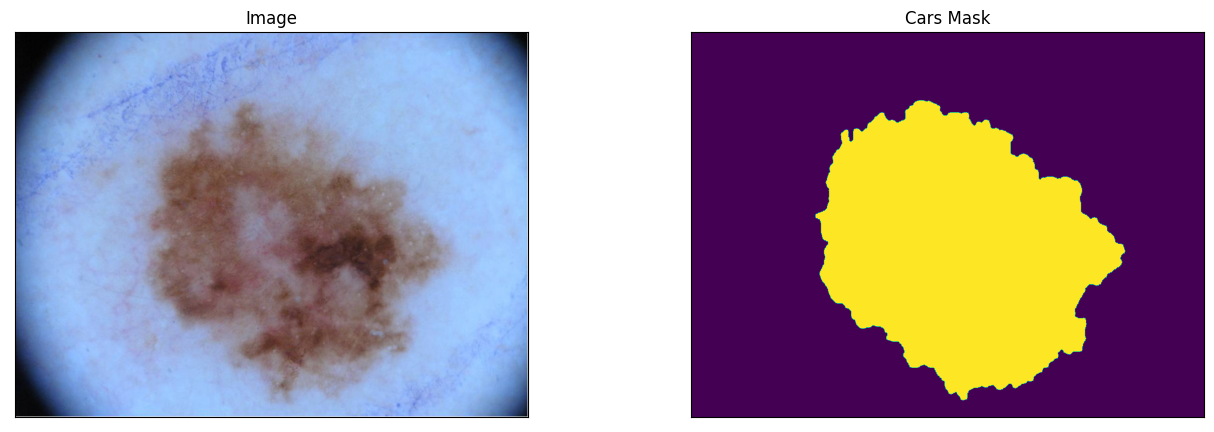

In [4]:

train_csv_folder = pd.read_csv(_csv_path_train)
train_imgs_id = train_csv_folder['image_id'].values
train_imgs_path = ["{}{}.jpg".format(_imgs_folder_train_original, img_id) for img_id in train_imgs_id]
train_imgs_path_segmentation = ["{}{}_segmentation.png".format(_imgs_folder_train_original_segmentation, img_id) for img_id in train_imgs_id]


dt = MyDatasetSeg(train_imgs_path, train_imgs_path_segmentation, classes=['lesion'])

image, mask = dt[2] # get some sample

visualize(
    image=image, 
    cars_mask=mask,
)